# CASE STUDY - Cyclist Bike Share 

# Background Information 

## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Cyclistic believes that maximizing the number of annual members will be key to future growth. 


Goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.


In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 ASK

Aim: Understand difference between casual and annual members.
Business Goal: Convert casual cyclist to membership.

In [3]:
#data imports 
# source from cyclist case-study 
apr_20 = pd.read_csv('./data/202004-divvy-tripdata.csv')
may_20 = pd.read_csv('./data/202005-divvy-tripdata.csv')
jun_20 = pd.read_csv('./data/202006-divvy-tripdata.csv')
jul_20 = pd.read_csv('./data/202007-divvy-tripdata.csv')
aug_20 = pd.read_csv('./data/202008-divvy-tripdata.csv')
sep_20 = pd.read_csv('./data/202009-divvy-tripdata.csv')
oct_20 = pd.read_csv('./data/202010-divvy-tripdata.csv')
nov_20 = pd.read_csv('./data/202011-divvy-tripdata.csv')
dec_20 = pd.read_csv('./data/202012-divvy-tripdata.csv')
jan_21 = pd.read_csv('./data/202101-divvy-tripdata.csv')
feb_21 = pd.read_csv('./data/202102-divvy-tripdata.csv')
mar_21 = pd.read_csv('./data/202103-divvy-tripdata.csv')
apr_21 = pd.read_csv('./data/202104-divvy-tripdata.csv')
may_21 = pd.read_csv('./data/202105-divvy-tripdata.csv')

In [4]:
stacked = [apr_20, may_20, jun_20, jul_20, aug_20, sep_20, oct_20, nov_20, dec_20, jan_21, feb_21, mar_21, apr_21, may_21]
cyclist = pd.concat(stacked)
#sample df
cyclist.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


In [5]:
cyclist.shape

(4358611, 13)

# 2.0 PREPARE AND PROCESS

1. Reliable 
2. Original
3. Comprehensive
4. Current
5. Cited

Dataset obtained is from Motivate International Inc under license through Google Analytics Certification Course. 
The public data allows exploration study on the customer types with data-privacy protection in place. Dataset extracted consists of the 14 months riders usage of the Cyclistic company. 

In [6]:
cyclist.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


In [7]:
#evaluate null values
cyclist.isnull().mean()

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.046339
start_station_id      0.046483
end_station_name      0.052680
end_station_id        0.052785
start_lat             0.000000
start_lng             0.000000
end_lat               0.001252
end_lng               0.001252
member_casual         0.000000
dtype: float64

In [8]:
#drop is lat and lng missing
cyclist.dropna(axis=0, subset=['end_lat', 'end_lng'], inplace=True)

In [9]:
#remove as not applicable to the
cyclist.drop(columns=['start_station_name', 'start_station_id', 'end_station_name','end_station_id'], inplace=True)

In [10]:
#reset indexing
cyclist.reset_index(inplace=True, drop=True)

Missing information on start and end station does not affect the major investigation on the member and casual behaviour. Additionally it consist of 5% of the total dataset only. With such massive input, the data will be removed.

In [11]:
cyclist.shape

(4353154, 9)

In [12]:
cyclist.member_casual.value_counts(normalize=True)

member    0.581641
casual    0.418359
Name: member_casual, dtype: float64

In [13]:
#changing labels for member = 1, casual = 0 
cyclist.member_casual.replace({'member' :1 , 'casual':0}, inplace=True)

# 3.0 ANALYZE

## Bike Types

In [14]:
cyclist.rideable_type.unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

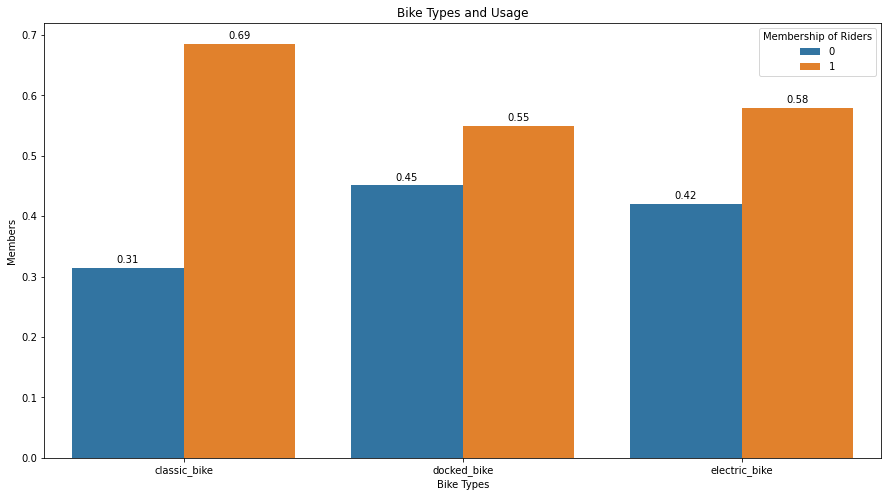

In [15]:
plt.figure(figsize=(15,8))
temp_df = cyclist.groupby(['rideable_type','member_casual']).agg('count')
temp_df = temp_df / temp_df.groupby(level=0).sum()
graph= sns.barplot(data=temp_df.reset_index(), x='rideable_type', y ='ride_id', hue='member_casual',)
plt.title('Bike Types and Usage')
plt.ylabel('Members')
plt.xlabel('Bike Types')
plt.legend(title='Membership of Riders')

#annotation
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.005),
                ha='center', va='bottom',
               color= 'black')

plt.show()

Riders are mostly members with highest preference for classic bike. Whereas casual riders does not have preference in the usage of bike.

Type of bikes and location 

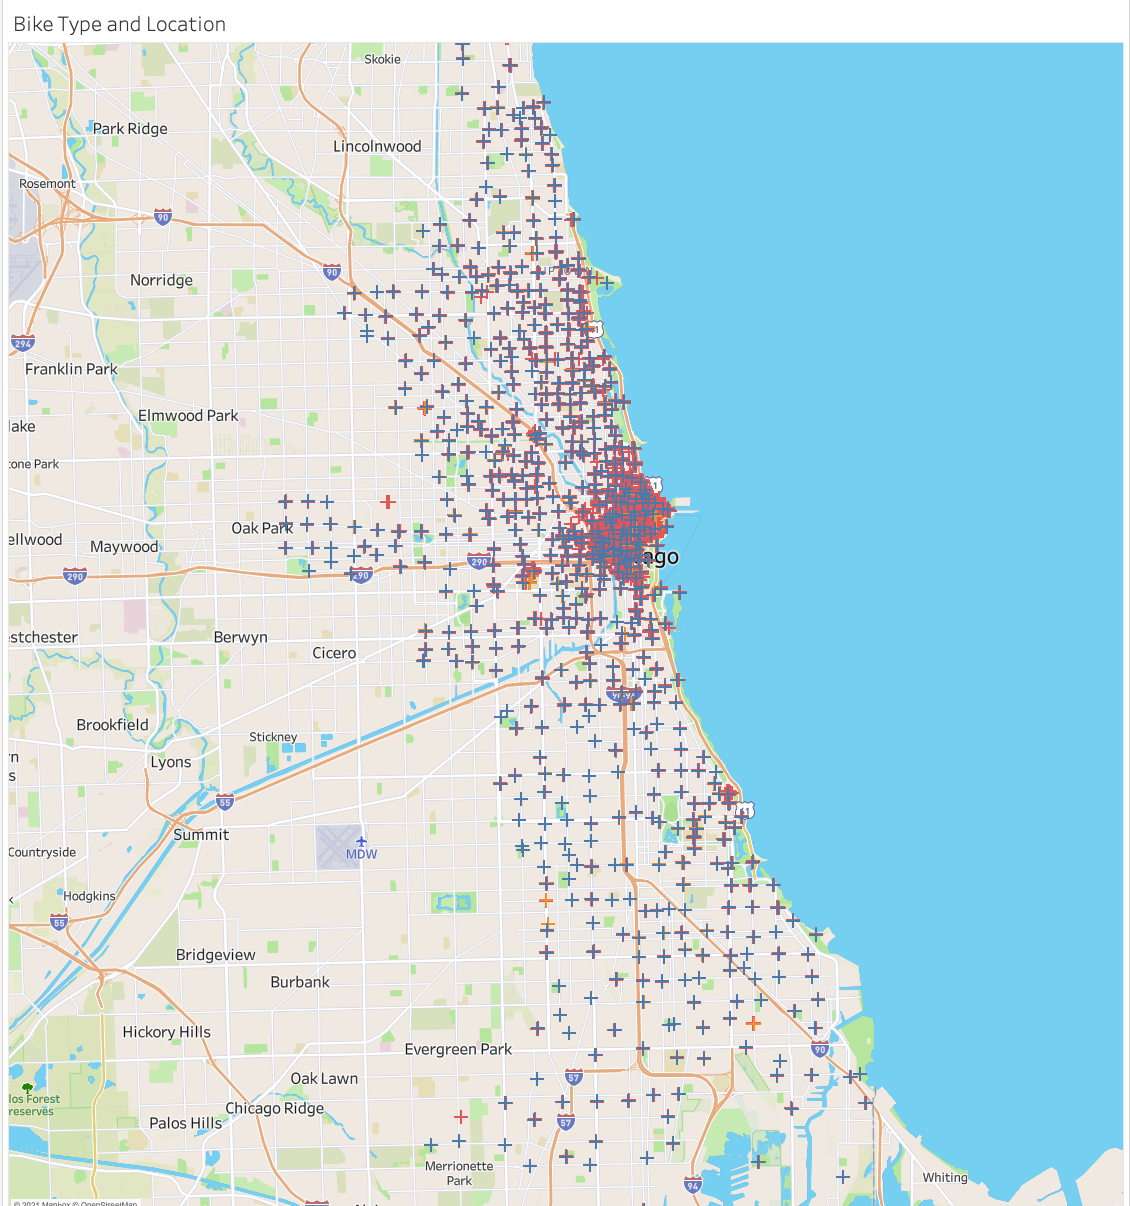

Bike types and accesibility is fair and well distributed in Chicago. Almost all station has all three types of bike accessible for riders selection. Most stations are well located within Chicago Central District.

## Riding Duration

In [16]:
# convert to_datetime
cyclist.started_at = pd.to_datetime(cyclist.started_at)
cyclist.ended_at = pd.to_datetime(cyclist.ended_at)

In [17]:
#calculate ride length
cyclist['ride_length'] = cyclist.ended_at - cyclist.started_at

In [18]:
cyclist[cyclist.ride_length.dt.days > 0]['member_casual'].value_counts()

0    2333
1     200
Name: member_casual, dtype: int64

Cyclist that rents more than a day are usually casual riders.

In [19]:
cyclist['ride_length'] = cyclist.ride_length.dt.seconds

## Riding Hours in Rate

In [20]:
cyclist['hour_start'] = cyclist.started_at.dt.hour
cyclist['hour_end'] = cyclist.ended_at.dt.hour

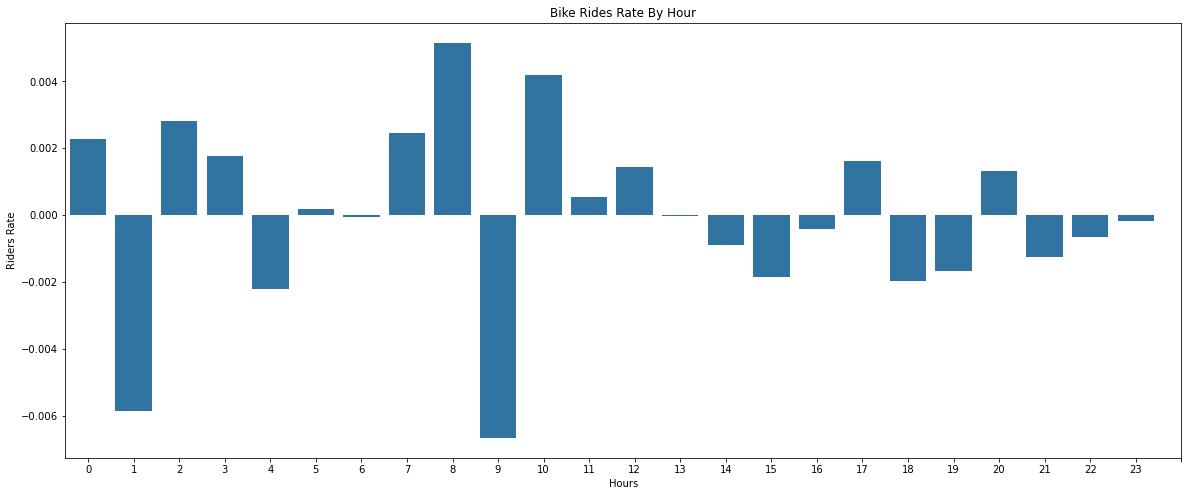

In [21]:
fig= plt.figure(figsize=(20,8))

temp_df1 = cyclist.hour_start.value_counts(normalize=True).reset_index()
temp_df2 = cyclist.hour_end.value_counts(normalize=True).reset_index()
temp_df3 = (temp_df1.hour_start - temp_df2.hour_end).reset_index().rename(columns={0:'rate'})

# fig.add_axes(sns.lineplot(data=temp_df1, x='index', y='hour_start', label='START'))
# fig.add_axes(sns.lineplot(data=temp_df2, x='index', y ='hour_end', label='END'))
fig.add_axes(sns.barplot(data=temp_df3, x='index', y ='rate', label='Rate', color="tab:blue"))

plt.title('Bike Rides Rate By Hour')
plt.ylabel('Riders Rate')
plt.xlabel('Hours')
plt.xticks(np.linspace(0,24,num=25))

#-ve more enders, +ve more starters 
plt.show()

Riders are using the bikes mostly at peak hours for commute to work purpose, with increasing rate at 7am-8am and drops at 9am. It picks up again around 4pm as it closes at EOB. 

## Break into Three Category 

In [22]:
#morning session, 5-9, 10-15,16-20. 20-4 
def session_group(hour):
    if 9 >= hour >= 5:
        return 'morning'
    elif 15 >= hour >= 10:
        return 'afternoon'
    elif 20 >= hour >= 16:
        return 'evening'
    else:
        return 'midnight'

In [23]:
cyclist['session'] = cyclist.hour_start.map(session_group)

In [24]:
cyclist.session.value_counts()

evening      1695155
afternoon    1665814
morning       579085
midnight      413100
Name: session, dtype: int64

In [25]:
cyclist['session_end'] = cyclist.hour_end.map(session_group)

In [26]:
cyclist.session_end.value_counts()

evening      1765913
afternoon    1577498
morning       535883
midnight      473860
Name: session_end, dtype: int64

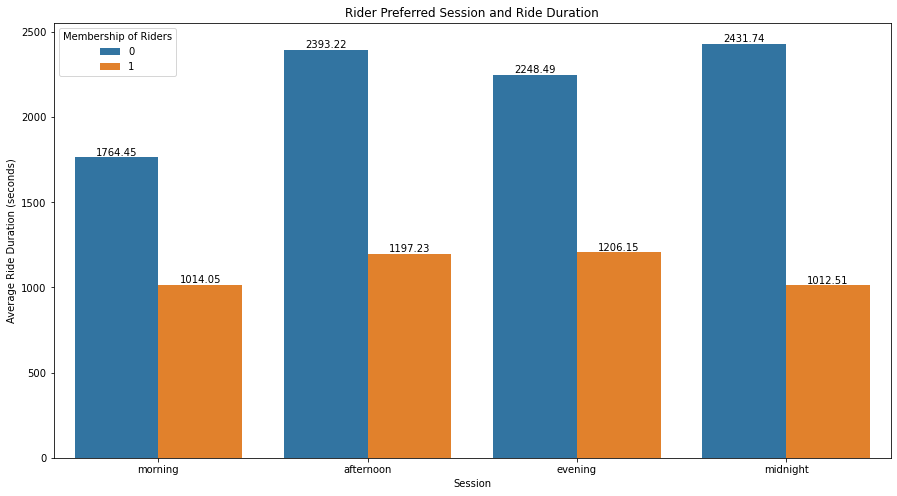

In [27]:
plt.figure(figsize=(15,8))
graph = sns.barplot(data=cyclist.groupby(['session','member_casual']).mean()[['ride_length']].reset_index(), 
                x='session', y='ride_length', hue='member_casual', order=['morning', 'afternoon','evening','midnight'])

plt.title('Rider Preferred Session and Ride Duration')
plt.ylabel('Average Ride Duration (seconds)')
plt.xlabel('Session')
plt.legend(title='Membership of Riders')

#annotation
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.005),
                ha='center', va='bottom',
               color= 'black')

plt.show()

Members ride shorter length, likely for commute purpose, whereas casual riders ride twice as much as duration. 

## Day of the Week - Start 

In [28]:
weekday_start = []
weekday_end = []
for row in range(cyclist.shape[0]):
    start = cyclist.started_at[row].weekday()
    end = cyclist.ended_at[row].weekday()
    weekday_start.append(start)
    weekday_end.append(end)

In [29]:
cyclist['day_of_week'] = weekday_start
cyclist['day_of_week_end'] = weekday_end

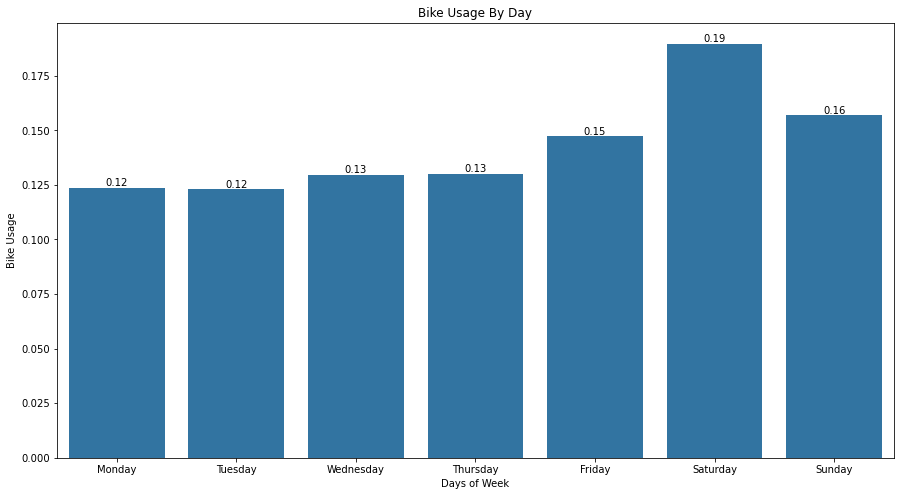

In [30]:
plt.figure(figsize=(15,8))
temp_df = cyclist.day_of_week.value_counts(normalize=True).reset_index()
graph= sns.barplot(data=temp_df, x='index', y ='day_of_week', color="tab:blue")
plt.title('Bike Usage By Day')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'])
plt.ylabel('Bike Usage')
plt.xlabel('Days of Week')

#annotation
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()),
                ha='center', va='bottom',
               color= 'black')

plt.show()

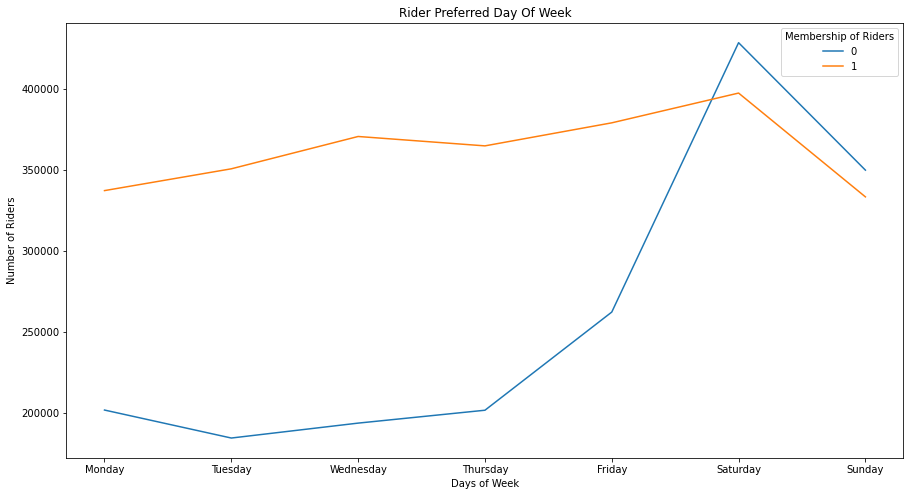

In [31]:
plt.figure(figsize=(15,8))
graph = sns.lineplot(data=cyclist.groupby(['day_of_week','member_casual']).agg('count').reset_index(), 
                x='day_of_week', y='ride_id', hue='member_casual')

plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'])
plt.title('Rider Preferred Day Of Week')
plt.ylabel('Number of Riders')
plt.xlabel('Days of Week')
plt.legend(title='Membership of Riders')
plt.show()

Casual riders riding on weekends compared to member. This is a unique behaviour to casual riders and likely due to the lack of consistent usage, hence opted for casual riding only. 

## Repeat riders

In [76]:
temp_df = cyclist[cyclist.duplicated(subset='ride_id', keep='last')]

In [79]:
temp_df.member_casual.value_counts()

1    183
0     25
Name: member_casual, dtype: int64

Low count of casual riders that repeats the bike services. Likely they are tourist visiting rather than residents.

## Riding Seasonality

In [34]:
import mpu

def distance_calc(lat1, lon1, lat2, lon2):
    dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
    return dist

In [35]:
distance = []
for i in range(cyclist.shape[0]):
    dist = distance_calc(cyclist.start_lat[i],cyclist.start_lng[i], cyclist.end_lat[i],cyclist.end_lng[i])
    distance.append(dist)

In [36]:
cyclist['dist_travelled'] = distance

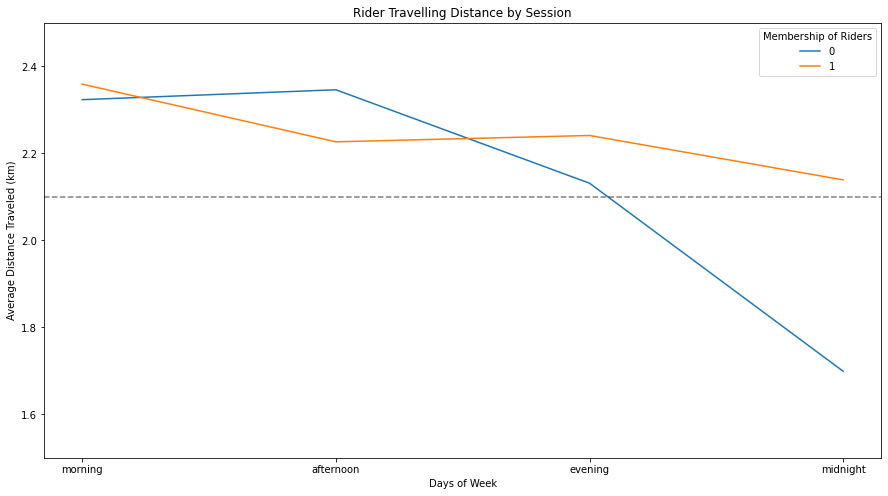

In [90]:
plt.figure(figsize=(15,8))

cyclist['session'] = pd.Categorical(cyclist['session'],
                                   categories=['morning', 'afternoon', 'evening', 'midnight'],
                                   ordered=True)

graph = sns.lineplot(data=cyclist.groupby(['member_casual', 'session']).agg('mean')[['dist_travelled']].reset_index(), 
                x='session', y='dist_travelled', hue='member_casual')


plt.title('Rider Travelling Distance by Session')
plt.ylabel('Average Distance Traveled (km)')
plt.xlabel('Days of Week')
plt.legend(title='Membership of Riders')
plt.ylim(1.5,2.5)
plt.axhline(2.1, color='k', linestyle='--', alpha=0.5)
plt.show()

In [95]:
cyclist.groupby(['member_casual', 'session']).agg(['mean', 'count'])[['dist_travelled']]

dist_travelled        
                                  mean   count
member_casual session                         
0             morning         2.323514  141339
              afternoon       2.346279  731646
              evening         2.131413  711216
              midnight        1.699034  236979
1             morning         2.359222  437746
              afternoon       2.226589  934168
              evening         2.241186  983939
              midnight        2.139093  176121

Members are consistent riders that find the use in subsciption uses the service throughout the day. Unlike casual riders that uses the service in the day time.

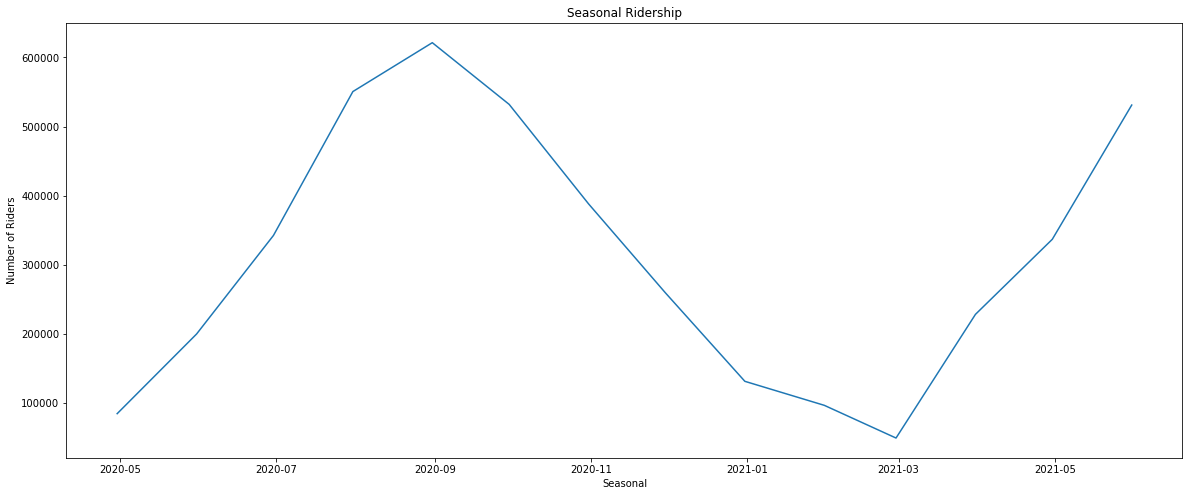

In [136]:
plt.figure(figsize=(20,8))
temp_df = cyclist.set_index('started_at')
graph = sns.lineplot(data=temp_df.resample('M').count()[['ride_id']].reset_index(), 
                x='started_at', y='ride_id')

plt.title('Seasonal Ridership')
plt.ylabel('Number of Riders')
plt.xlabel('Seasonal')

plt.show()

Ridership peaks in September. Hence campaign recommended between July to August during the summer holidays.

# Rider Density

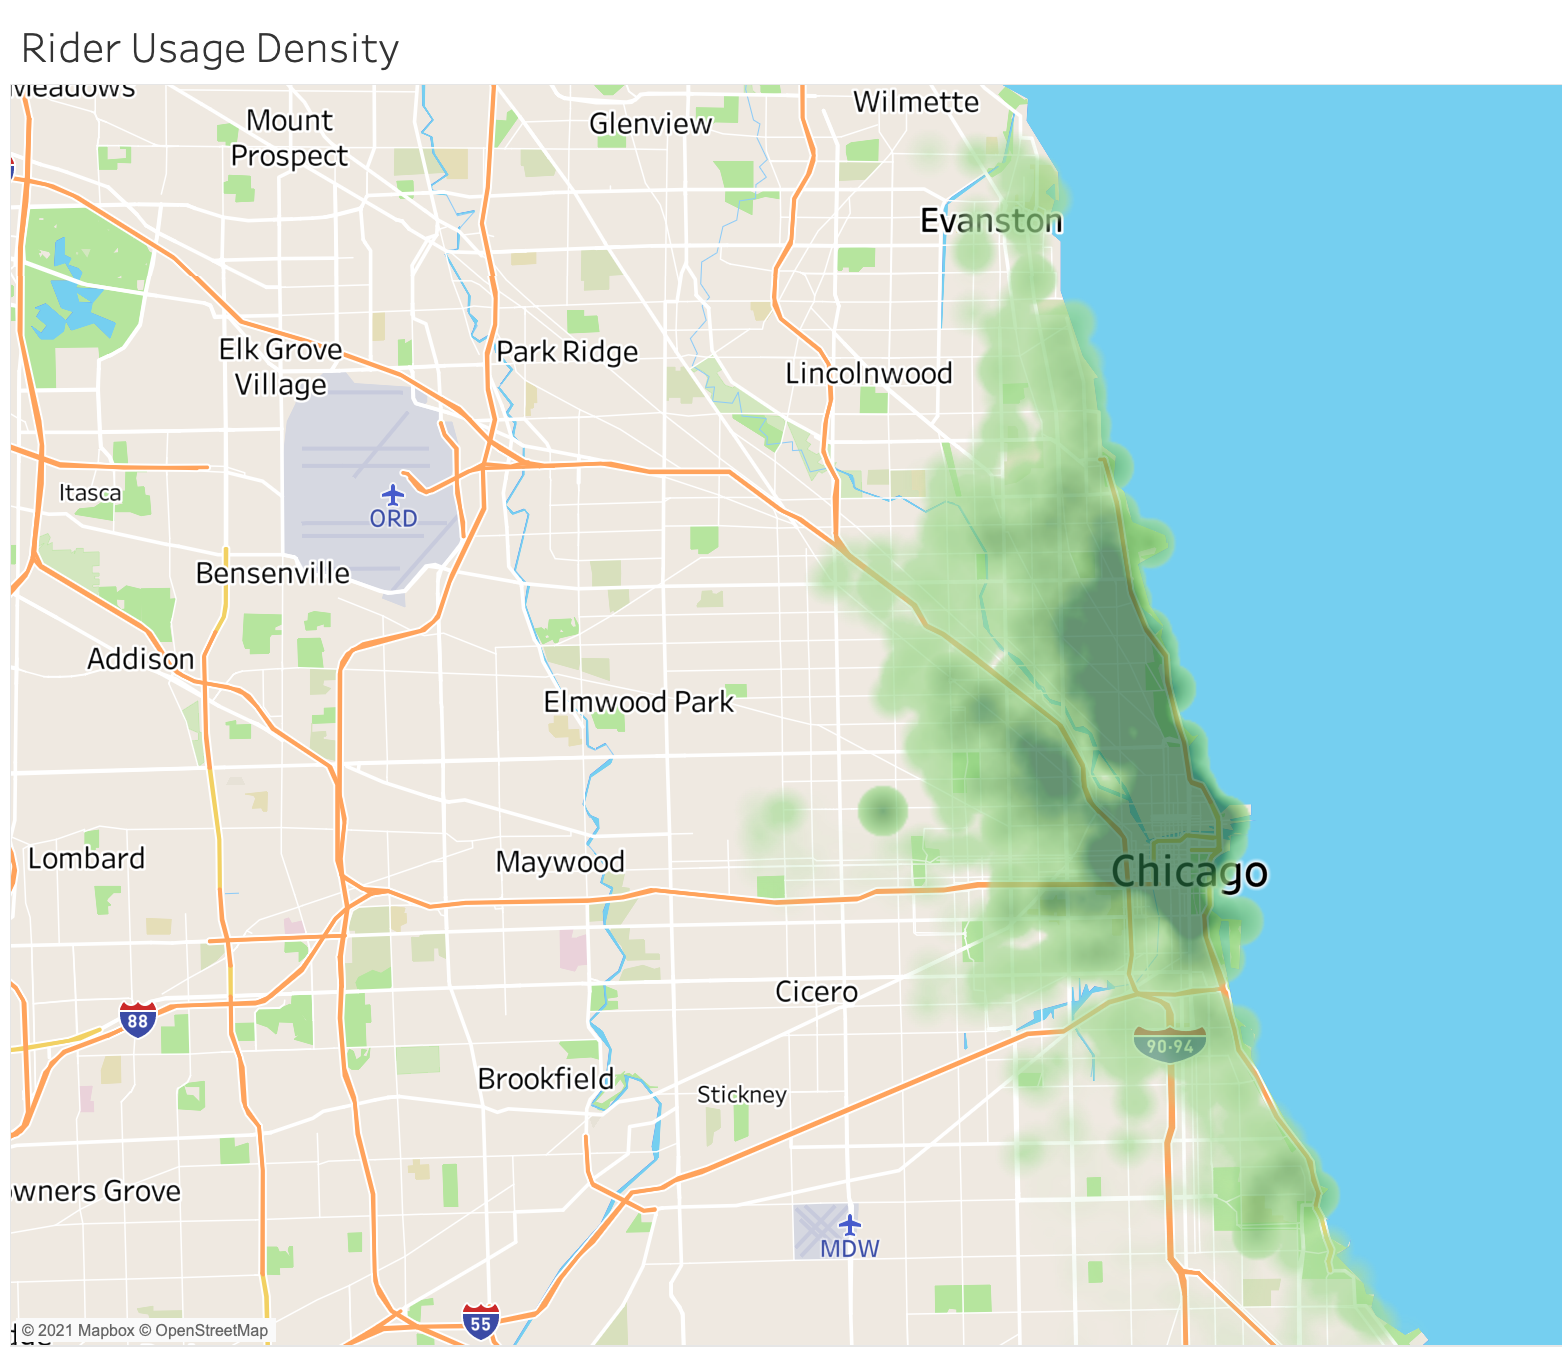

Image generated from Tableau

High density in the central Chicago where most rides take place. It is also near tourist landmark, Cloud Gate and Field Museum is located. 

# 4.0 Export for Tableau Map

In [38]:
cyclist.to_csv('./files/cleaned_cyclist.csv', index=False)

# 5.0 Recommendation

Difference between casual riders and members are driven by the following 

1. Purpose
2. Duration 

Members are subscribed to us with intention to use the service for commuting purpose, unlike casual rider who rides during weekends and at a longer duration, for leisure. 


The travelling distance shows that most casual riders are using the service in between 30 to 40 minutes per session whereas members ride between 16 - 20 regardless of the time of the day. This is twice as much time spent compared to members. 

The timeline of the usage of the service revolves are also different for both as casual riders ride msotly in the day, unlike members that has a fair distribution of usage through out the day. 


As a new rollout plan to target casual riders in conversion to members, we can look into the following apprach to the casual riders.

1. Package that is unique for weekend riders
     - This targets weekend leisure riders (Impact: 43,000 casual riders) 
2. Package price for subscription that cover specific travelling location in the city. 
    - This targets riders in travelling above 2.2km (Impact: 87,000 casual riders)
    
3. Package that offer promotion for off-peak
    - This targets riders in midnight (Impact :23,000 casual riders)

Digital Marketing plans can be targetted in 

1. Jul- August in its launching to catch he wave prior to the peak in September.
2. Advertising in areas where high density areas for higher awareness and exposure. 